## Intro til geopandas for GIS-folk

Åpne heller notebook-en her:

https://nbviewer.org/github/statisticsnorway/intro_til_geopandas/blob/main/4_geopandas_for_GIS_folk.ipynb

Notebook-en er todelt:
- første halvdel: pandas/Python
- andre halvdel: geopandas/GIS

### Aller først: hva er geopandas?

Geopandas er en python-pakke ala arcpy og pyqgis.

GIS-biten er basert på de samme algoritmene som i QGIS, POSTGIS osv. (fra GEOS, GDAL og PROJ).

Det som ikke har med GIS å gjøre er basert på pakken pandas.

Første del av denne notebooken handler mest om pandas. Andre del om geopandas.

### Så hvordan fungerer pandas (og Python)?

#### Tall:

In [1]:
tall = 6
tall

6

#### Tekst:

In [2]:
tekst = "0301"
tekst

'0301'

#### Liste
Lister som inneholder tall eller tekst. Eller andre ting (alt er lov å putte inni lister)

In [3]:
liste = [tekst, "3401", "3401", "0301", "3401"]
liste

['0301', '3401', '3401', '0301', '3401']

In [4]:
liste2 = [tall, 3, 8, 24, 11]
liste2

[6, 3, 8, 24, 11]

#### tuple:
Nesten som lister, men litt mindre fleksible fordi de ikke kan endres på (men de tar mindre plass i minnet)

In [5]:
tuple1 = (tall, 3, 8, 24, 11)
tuple1

(6, 3, 8, 24, 11)

#### Ordbok (dictionary)

De består av nøkkel-verdi-par (key-value pairs)
- verdier, som kan være hva som helst, for eksempel en liste
- nøkler som er knyttet til verdiene

In [6]:
verdier = [1,2,3]
ordbok = {"nøkkel": verdier}
ordbok

{'nøkkel': [1, 2, 3]}

In [7]:
ordbok = {"KOMMUNENR": liste, "tall": liste2}
ordbok

{'KOMMUNENR': ['0301', '3401', '3401', '0301', '3401'],
 'tall': [6, 3, 8, 24, 11]}

In [8]:
ordbok["KOMMUNENR"]

['0301', '3401', '3401', '0301', '3401']

In [9]:
ordbok["tall"]

[6, 3, 8, 24, 11]

Dette er de viktigste innebygde objekttypene i Python.

En Pandas DataFrame er en litt mer fancy objekttype, men den er basert på blant annet de innebygde Python-typene.

Hver objekttype i Python har spesifikke metoder/funksjoner knyttet til seg. Syntaxen er gjerne sånn her:

objekt.metode()

For eksempel har tekst-typen (string) metoder som lower og zfill:

In [10]:
tekst = "KOMMUNENR"
tekst.lower() # til små bokstaver

'kommunenr'

In [11]:
tekst = "301"
tekst.zfill(4)  #fyller på med ledende 0 hvis færre enn fire bokstaver

'0301'

Lister har egne metoder:

In [12]:
liste = [1, 2, 3]
liste.remove(2) # fjerner verdien 2 fra lista (fjerner bare én hvis flere 2-ere)
liste.reverse() # snur lista
liste

[3, 1]

### pandas

In [13]:
import pandas as pd

En pandas.DataFrame er en slags ordbok bestående av nøkler (kolonnenavn) og verdier (kolonneverdier):

In [14]:
pd.DataFrame(ordbok)

,KOMMUNENR,tall
0,0301,6
1,3401,3
2,3401,8
3,0301,24
4,3401,11


Altså:

In [15]:
df = pd.DataFrame({
    "KOMMUNENR": ['0301', "3401", "3401", "0301", "3401"],
    "tall": [6, 3, 8, 24, 11]
})
df

,KOMMUNENR,tall
0,0301,6
1,3401,3
2,3401,8
3,0301,24
4,3401,11


DataFramen har egne metoder knyttet til seg, for eksempel:

In [16]:
df.drop_duplicates("KOMMUNENR") # beholder første verdi for hvert kommunenummer

,KOMMUNENR,tall
0,0301,6
1,3401,3


In [17]:
df.groupby("KOMMUNENR").sum() # summerer for hvert unike kommunenummer

,tall
KOMMUNENR,
0301,30
3401,22


Mer om det under.

Man refererer til en kolonne på samme måte som nøklene i en ordbok:

In [18]:
ordbok["tall"]

[6, 3, 8, 24, 11]

In [19]:
df["tall"]

0     6
1     3
2     8
3    24
4    11
Name: tall, dtype: int64

Man kan endre hver rad i kolonnen direkte (trenger ingen field calculator):

In [20]:
df["tall"] + 100

0    106
1    103
2    108
3    124
4    111
Name: tall, dtype: int64

For å lagre det som en ny kolonne:

In [21]:
df["tall_pluss_100"] = df["tall"] + 100
df

,KOMMUNENR,tall,tall_pluss_100
0,0301,6,106
1,3401,3,103
2,3401,8,108
3,0301,24,124
4,3401,11,111


Man kan også referere til kolonner med punktum (det funker riktignok ikke å lage en ny kolonne på denne måten):

In [22]:
df.tall

0     6
1     3
2     8
3    24
4    11
Name: tall, dtype: int64

### geopandas
Samme regler gjelder for geopandas.

In [128]:
import geopandas as gpd

I geopandas starter man med å lese inn dataene sine som en GeoDataFrame.

For eksempel vegdata for Oslo:

In [24]:
veger = gpd.read_file("C:/users/ort/namibia/roads_oslo_2020.gpkg")
veger

,traffic_per_day,speed_limit,roadtype,bridge,tunnel,municipality,geometry
0,5.086812,30,K,0,0,0301,"LINESTRING (264428.800 6660601.970, 264426.510..."
1,10.173623,30,K,0,0,0301,"LINESTRING (265904.131 6644537.702, 265942.621..."
2,10.096893,30,K,0,0,0301,"LINESTRING (261473.700 6650780.800, 261477.060..."
3,1.017362,30,K,0,0,0301,"LINESTRING (270551.267 6651700.294, 270557.649..."
4,10.173623,30,K,0,0,0301,"LINESTRING (256149.500 6650711.400, 256159.700..."
...,...,...,...,...,...,...,...
13226,98578.000000,80,E,1,0,0301,"LINESTRING (270398.124 6651558.120, 270410.319..."
13227,98578.000000,80,E,1,0,0301,"LINESTRING (270413.502 6651546.876, 270418.669..."
13228,127801.000000,50,R,0,0,0301,"LINESTRING (260769.400 6649207.600, 260770.848..."
13229,127801.000000,50,R,0,0,0301,"LINESTRING (260847.878 6649214.850, 260845.650..."


Legg merke til kolonnen "geometry". Den forteller at vi har linjegeometrier, og koordinatene ser ut til å være i utm-format.

Det stemmer:

In [25]:
veger.crs

<Derived Projected CRS: EPSG:25833>
Name: ETRS89 / UTM zone 33N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe between 12°E and 18°E: Austria; Denmark - offshore and offshore; Germany - onshore and offshore; Norway including Svalbard - onshore and offshore.
- bounds: (12.0, 46.4, 18.01, 84.42)
Coordinate Operation:
- name: UTM zone 33N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

Når man leser filen, kan man også velge hvilke kolonner og rader man vil lese. 

Og fjerne Z-koordinater.

c:\Users\ort\Anaconda3\envs\geo_env311\Lib\site-packages\pyogrio\core.py:21: RuntimeWarning: Could not detect GDAL data files.  Set GDAL_DATA environment variable to the correct path.
  _init_gdal_data()
c:\Users\ort\Anaconda3\envs\geo_env311\Lib\site-packages\pyogrio\core.py:22: RuntimeWarning: Could not detect PROJ data files.  Set PROJ_LIB environment variable to the correct path.
  _init_proj_data()


80    1024
90      29
Name: speed_limit, dtype: int64
E    761
R    292
Name: roadtype, dtype: int64


,roadtype,speed_limit,geometry
0,E,80,"LINESTRING (267174.603 6638456.049, 267178.633..."
1,E,80,"LINESTRING (267233.819 6638461.242, 267237.144..."
2,E,80,"LINESTRING (267237.342 6638497.040, 267239.825..."
3,E,80,"LINESTRING (267237.342 6638497.040, 267239.825..."
4,E,80,"LINESTRING (267090.862 6638314.429, 267095.427..."
...,...,...,...
1048,E,80,"LINESTRING (270068.921 6651397.425, 270071.656..."
1049,E,80,"LINESTRING (270503.830 6651604.085, 270510.000..."
1050,E,80,"LINESTRING (270518.684 6651592.404, 270529.200..."
1051,E,80,"LINESTRING (270398.124 6651558.120, 270410.319..."


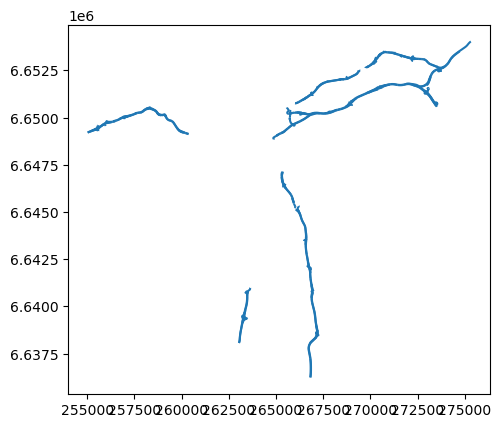

In [26]:
import pyogrio
noen_veger = gpd.read_file("C:/users/ort/namibia/roads_oslo_2020.gpkg", engine = "pyogrio",
                       
                       columns = ["speed_limit", "roadtype"],
                      
                       where = "speed_limit >= 80 and roadtype in ('R', 'E')", # OBS: syntaxen er litt annerledes for lesing av geoparquet-filer
                           
                       force_2d = True,
                     )

print(noen_veger.speed_limit.value_counts())
print(noen_veger.roadtype.value_counts())

noen_veger.plot()
noen_veger

Man kan også lese kun et område, for eksempel 500 meter rundt SSB i Akersveien:

In [27]:
from shapely.wkt import loads
akersveien = gpd.GeoDataFrame({"geometry": gpd.GeoSeries(loads("POINT (10.7476913 59.9222196)"))}, crs=4326).to_crs(25833)
akersveien["geometry"] = akersveien.buffer(500)

veger = gpd.read_file("C:/users/ort/namibia/roads_oslo_2020.gpkg", 
                      engine = "pyogrio",
                      bbox = akersveien
                     )
veger.explore()

Men nå vil jeg ha alle veger:

<AxesSubplot: >

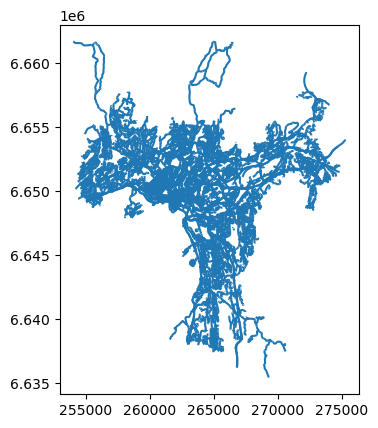

In [28]:
veger = gpd.read_file("C:/users/ort/namibia/roads_oslo_2020.gpkg")
veger.plot()

For å kartlegge, kan man bruke plot for statiske kart, og explore for interaktive. Det statiske kartet bruker en python-pakke for graflegging (matplotlib), derfor får man koordinatene i x- og y-aksene:

<AxesSubplot: >

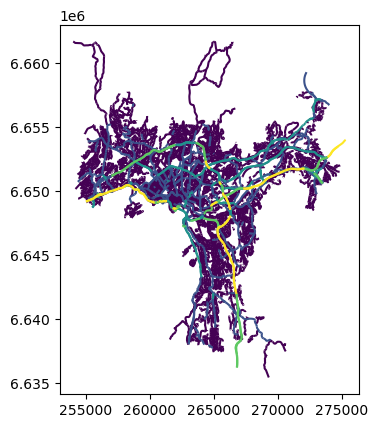

In [29]:
veger.plot("traffic_per_day", scheme="NaturalBreaks")

Man kan også undersøke dataene grafisk:

<AxesSubplot: ylabel='Frequency'>

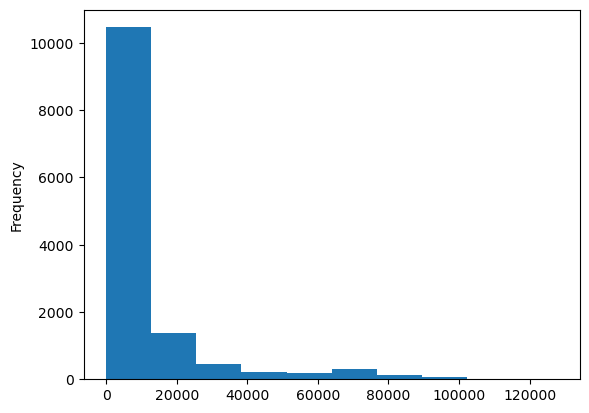

In [30]:
veger["traffic_per_day"].plot.hist()

Eller se på snitt, sum, median osv:

In [31]:
veger["traffic_per_day"].describe()

count     13231.000000
mean      10001.076366
std       17807.724689
min           1.011709
25%         505.854358
50%        2524.223344
75%       10864.796405
max      127801.000000
Name: traffic_per_day, dtype: float64

### Syntaksen i pandas og geopandas er som regel enten:

- data.attributt

- data.metode()

- data.kolonne.attributt

- data.kolonne.metode()

En attributt inneholder informasjon om dataene.

En metode innebærer å gjøre endringer i dataene. 

En geopandas.GeoDataFrame har alle attributter og metoder som tilhører pandas.DataFrame, og i tillegg en del GIS-attributter og -metoder.

Her er noen (Geo)DataFrame-attributter:

In [32]:
veger.columns # liste over kolonnene

Index(['traffic_per_day', 'speed_limit', 'roadtype', 'bridge', 'tunnel',
       'municipality', 'geometry'],
      dtype='object')

In [33]:
veger.shape # antall rader og kolonner

(13231, 7)

In [34]:
veger.crs # koordinatsystemet

<Derived Projected CRS: EPSG:25833>
Name: ETRS89 / UTM zone 33N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe between 12°E and 18°E: Austria; Denmark - offshore and offshore; Germany - onshore and offshore; Norway including Svalbard - onshore and offshore.
- bounds: (12.0, 46.4, 18.01, 84.42)
Coordinate Operation:
- name: UTM zone 33N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [35]:
veger.traffic_per_day # kolonnene regnes også som attributter

0             5.086812
1            10.173623
2            10.096893
3             1.017362
4            10.173623
             ...      
13226     98578.000000
13227     98578.000000
13228    127801.000000
13229    127801.000000
13230    127801.000000
Name: traffic_per_day, Length: 13231, dtype: float64

In [36]:
veger.area # = Shape_Area

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
13226    0.0
13227    0.0
13228    0.0
13229    0.0
13230    0.0
Length: 13231, dtype: float64

In [37]:
veger.length # = Shape_Leng

0         82.390976
1         38.554546
2         73.216237
3         33.077028
4         42.720896
            ...    
13226     18.150059
13227     17.843207
13228     82.762118
13229     90.264295
13230    289.928014
Length: 13231, dtype: float64

Man kan gjøre matte direkte på kolonner og area/length-attributtene:

In [38]:
veger["traffic_per_km"] = veger.traffic_per_day / (veger.length / 1000)
veger.head()

,traffic_per_day,speed_limit,roadtype,bridge,tunnel,municipality,geometry,traffic_per_km
0,5.086812,30,K,0,0,0301,"LINESTRING (264428.800 6660601.970, 264426.510...",61.739912
1,10.173623,30,K,0,0,0301,"LINESTRING (265904.131 6644537.702, 265942.621...",263.876099
2,10.096893,30,K,0,0,0301,"LINESTRING (261473.700 6650780.800, 261477.060...",137.905112
3,1.017362,30,K,0,0,0301,"LINESTRING (270551.267 6651700.294, 270557.649...",30.757368
4,10.173623,30,K,0,0,0301,"LINESTRING (256149.500 6650711.400, 256159.700...",238.141616


Med tekstkolonner kan man bruke pandas sin str-attributt, som gjør at man kan bruke metoder som tilhører Pythons innebygde string-type (altså tekst), og noen metoder til.

In [39]:
veger["FYLKE"] = veger.municipality.str[:2] # velg ut to første tegnene
veger["roadtype"] = veger.roadtype.str.lower() # små bokstaver
veger["municipality"] = veger.municipality.str.zfill(4) # legg til ledende 0 i 3-sifrede kommunenumre
veger.head()

,traffic_per_day,speed_limit,roadtype,bridge,tunnel,municipality,geometry,traffic_per_km,FYLKE
0,5.086812,30,k,0,0,0301,"LINESTRING (264428.800 6660601.970, 264426.510...",61.739912,03
1,10.173623,30,k,0,0,0301,"LINESTRING (265904.131 6644537.702, 265942.621...",263.876099,03
2,10.096893,30,k,0,0,0301,"LINESTRING (261473.700 6650780.800, 261477.060...",137.905112,03
3,1.017362,30,k,0,0,0301,"LINESTRING (270551.267 6651700.294, 270557.649...",30.757368,03
4,10.173623,30,k,0,0,0301,"LINESTRING (256149.500 6650711.400, 256159.700...",238.141616,03


Her gjøre man altså dette for hver rad i kolonnen:

In [40]:
"0301"[:2] # velg ut to første tegnene

'03'

In [41]:
"K".lower() # små bokstaver

'k'

In [42]:
"0301".zfill(4) # legg til ledende 0 i 3-sifrede kommunenumre

'0301'

GIS-funksjoner er metoder som tilhører geodataframen. Så man skriver gjerne:

data.gisfunksjon()

In [43]:
veger.buffer(10)

0        POLYGON ((264380.693 6660626.836, 264382.511 6...
1        POLYGON ((265942.043 6644549.915, 265943.024 6...
2        POLYGON ((261485.070 6650782.257, 261491.127 6...
3        POLYGON ((270554.428 6651711.907, 270568.811 6...
4        POLYGON ((256152.494 6650728.934, 256152.810 6...
                               ...                        
13226    POLYGON ((270406.400 6651572.515, 270410.903 6...
13227    POLYGON ((270414.685 6651558.247, 270420.623 6...
13228    POLYGON ((260761.688 6649214.917, 260762.101 6...
13229    POLYGON ((260842.299 6649206.548, 260832.583 6...
13230    POLYGON ((261116.651 6649301.417, 261112.641 6...
Length: 13231, dtype: geometry

In [44]:
veger.dissolve(by="roadtype", aggfunc="sum") # med by='roadtype' holder man vegkategoriene adskilt, og man får summen av de andre kolonnene for hver vegkategori

c:\Users\ort\Anaconda3\envs\geo_env311\Lib\site-packages\geopandas\geodataframe.py:1676: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aggregated_data = data.groupby(**groupby_kwargs).agg(aggfunc)


,geometry,traffic_per_day,speed_limit,bridge,tunnel,traffic_per_km
roadtype,,,,,,
e,"MULTILINESTRING ((263566.500 6641060.900, 2635...",5.992813e+07,112600,588,253,3.836697e+09
f,"MULTILINESTRING ((261570.481 6638431.537, 2615...",2.130214e+06,12680,37,11,1.164902e+08
k,"MULTILINESTRING ((264428.800 6660601.970, 2644...",3.607319e+07,358730,307,11,2.491939e+09
r,"MULTILINESTRING ((268547.220 6653029.953, 2685...",3.419271e+07,101390,447,135,2.626201e+09


geopandas.dissolve er basert på pandas groupby + agg. Denne gjør samme grupperte oppsummering, men samler ikke geometrien:

In [45]:
veger.groupby("roadtype").sum(numeric_only = True)

,traffic_per_day,speed_limit,bridge,tunnel,traffic_per_km
roadtype,,,,,
e,5.992813e+07,112600,588,253,3.836697e+09
f,2.130214e+06,12680,37,11,1.164902e+08
k,3.607319e+07,358730,307,11,2.491939e+09
r,3.419271e+07,101390,447,135,2.626201e+09


Hvis man vil ha ulike aggregeringsmetoder:

In [46]:
summary_statistics = veger.groupby("roadtype").agg(
    
    traffic_per_day_sum = ('traffic_per_day','sum'), # kolonnenavn og aggregeringsmetode i tuple, altså med vanlig parentes, adskilt med komma
    
    speed_limit_mean = ('speed_limit','mean'),
    
    municipality = ('municipality','first')

)
summary_statistics

,traffic_per_day_sum,speed_limit_mean,municipality
roadtype,,,
e,5.992813e+07,68.826406,0301
f,2.130214e+06,52.833333,3020
k,3.607319e+07,36.478544,0301
r,3.419271e+07,66.660092,0301


## Velg kolonner

In [47]:
kolonner_du_vil_beholde = ["traffic_per_day", "traffic_per_km", "geometry"]

veger2 = veger[kolonner_du_vil_beholde]

veger2.head()

,traffic_per_day,traffic_per_km,geometry
0,5.086812,61.739912,"LINESTRING (264428.800 6660601.970, 264426.510..."
1,10.173623,263.876099,"LINESTRING (265904.131 6644537.702, 265942.621..."
2,10.096893,137.905112,"LINESTRING (261473.700 6650780.800, 261477.060..."
3,1.017362,30.757368,"LINESTRING (270551.267 6651700.294, 270557.649..."
4,10.173623,238.141616,"LINESTRING (256149.500 6650711.400, 256159.700..."


Samme som over, men på én linje:

In [48]:
veger2 = veger[["traffic_per_day", "traffic_per_km", "geometry"]]
veger2.head()

,traffic_per_day,traffic_per_km,geometry
0,5.086812,61.739912,"LINESTRING (264428.800 6660601.970, 264426.510..."
1,10.173623,263.876099,"LINESTRING (265904.131 6644537.702, 265942.621..."
2,10.096893,137.905112,"LINESTRING (261473.700 6650780.800, 261477.060..."
3,1.017362,30.757368,"LINESTRING (270551.267 6651700.294, 270557.649..."
4,10.173623,238.141616,"LINESTRING (256149.500 6650711.400, 256159.700..."


Man kan fjerne kolonner med drop():

In [49]:
veger2 = veger.drop(["speed_limit", "tunnel", "bridge", "roadtype", "municipality"], 
                    axis=1) # axis=1 betyr at man vil fjerne kolonner. axis=0 betyr rader
veger2.head()

,traffic_per_day,geometry,traffic_per_km,FYLKE
0,5.086812,"LINESTRING (264428.800 6660601.970, 264426.510...",61.739912,03
1,10.173623,"LINESTRING (265904.131 6644537.702, 265942.621...",263.876099,03
2,10.096893,"LINESTRING (261473.700 6650780.800, 261477.060...",137.905112,03
3,1.017362,"LINESTRING (270551.267 6651700.294, 270557.649...",30.757368,03
4,10.173623,"LINESTRING (256149.500 6650711.400, 256159.700...",238.141616,03


## Velg rader
Altså som select i arcpy.

Sånn fjerner man rader med trafikk under 1000:

In [50]:
veger2 = veger.loc[veger.traffic_per_day > 1000]

veger2.traffic_per_day.min()

1000.68371835

Man spør Python om kolonneverdiene er større enn 1000

In [51]:
2000 > 1000

True

In [52]:
500 > 1000

False

Dette gjøres for hver rad:

In [53]:
veger.traffic_per_day > 1000

0        False
1        False
2        False
3        False
4        False
         ...  
13226     True
13227     True
13228     True
13229     True
13230     True
Name: traffic_per_day, Length: 13231, dtype: bool

Og så velger man ut radene som er True

In [54]:
veger.loc[veger.traffic_per_day > 1000]

,traffic_per_day,speed_limit,roadtype,bridge,tunnel,municipality,geometry,traffic_per_km,FYLKE
4943,1002.981916,30,k,0,0,3024,"LINESTRING (255661.100 6649162.600, 255663.600...",1.502174e+04,30
4944,1001.895663,30,k,0,0,3029,"LINESTRING (272970.950 6649761.420, 272972.760...",1.080705e+04,30
4945,1002.659402,30,k,0,0,0301,"LINESTRING (264501.413 6653016.574, 264507.201...",5.404803e+04,03
4946,1000.683718,30,k,0,0,0301,"LINESTRING (268663.780 6651877.070, 268681.708...",1.632337e+04,03
4947,1002.981916,30,k,0,0,3024,"LINESTRING (254831.800 6651610.800, 254822.500...",4.509219e+03,30
...,...,...,...,...,...,...,...,...,...
13226,98578.000000,80,e,1,0,0301,"LINESTRING (270398.124 6651558.120, 270410.319...",5.431277e+06,03
13227,98578.000000,80,e,1,0,0301,"LINESTRING (270413.502 6651546.876, 270418.669...",5.524680e+06,03
13228,127801.000000,50,r,0,0,0301,"LINESTRING (260769.400 6649207.600, 260770.848...",1.544197e+06,03
13229,127801.000000,50,r,0,0,0301,"LINESTRING (260847.878 6649214.850, 260845.650...",1.415853e+06,03


Man kan også velge rader med pandas.query. Her trenger man bare å skrive kolonnenavnene (ikke tabellnavnet). Tar dermed mindre plass hvis man har mange kondisjoner:

In [55]:
veger2 = veger.query("traffic_per_day > 1000 | roadtype == 'E' & tunnel == 0")

## Velg rader og kolonner samtidig

Inni loc kan man velge først rader, så et komma, så kan man velge kolonner:

In [56]:
veger2 = veger.loc[veger.traffic_per_day > 1000, ["traffic_per_day", "traffic_per_km", "geometry"]]
veger2

,traffic_per_day,traffic_per_km,geometry
4943,1002.981916,1.502174e+04,"LINESTRING (255661.100 6649162.600, 255663.600..."
4944,1001.895663,1.080705e+04,"LINESTRING (272970.950 6649761.420, 272972.760..."
4945,1002.659402,5.404803e+04,"LINESTRING (264501.413 6653016.574, 264507.201..."
4946,1000.683718,1.632337e+04,"LINESTRING (268663.780 6651877.070, 268681.708..."
4947,1002.981916,4.509219e+03,"LINESTRING (254831.800 6651610.800, 254822.500..."
...,...,...,...
13226,98578.000000,5.431277e+06,"LINESTRING (270398.124 6651558.120, 270410.319..."
13227,98578.000000,5.524680e+06,"LINESTRING (270413.502 6651546.876, 270418.669..."
13228,127801.000000,1.544197e+06,"LINESTRING (260769.400 6649207.600, 260770.848..."
13229,127801.000000,1.415853e+06,"LINESTRING (260847.878 6649214.850, 260845.650..."


Behold bare rader med trafikk over 1000 eller europaveger som ikke er tunneller.

Og behold bare kolonner som inneholder ordene 'traffic'. Og behold geometri-kolonnen.

In [57]:
veger2 = veger.loc[(veger.traffic_per_day > 1000) | (veger.roadtype == 'E') & (veger.tunnel == 0),                    
                   (veger.columns.str.contains('traffic')) | (veger.columns=="geometry")]
veger2

,traffic_per_day,geometry,traffic_per_km
4943,1002.981916,"LINESTRING (255661.100 6649162.600, 255663.600...",1.502174e+04
4944,1001.895663,"LINESTRING (272970.950 6649761.420, 272972.760...",1.080705e+04
4945,1002.659402,"LINESTRING (264501.413 6653016.574, 264507.201...",5.404803e+04
4946,1000.683718,"LINESTRING (268663.780 6651877.070, 268681.708...",1.632337e+04
4947,1002.981916,"LINESTRING (254831.800 6651610.800, 254822.500...",4.509219e+03
...,...,...,...
13226,98578.000000,"LINESTRING (270398.124 6651558.120, 270410.319...",5.431277e+06
13227,98578.000000,"LINESTRING (270413.502 6651546.876, 270418.669...",5.524680e+06
13228,127801.000000,"LINESTRING (260769.400 6649207.600, 260770.848...",1.544197e+06
13229,127801.000000,"LINESTRING (260847.878 6649214.850, 260845.650...",1.415853e+06


Fjern kolonner som inneholder ordene 'traffic' eller 'speed' (og behold alle rader):

In [58]:
veger2 = veger.loc[:, ~veger.columns.str.contains('traffic|speed')]
veger2

,roadtype,bridge,tunnel,municipality,geometry,FYLKE
0,k,0,0,0301,"LINESTRING (264428.800 6660601.970, 264426.510...",03
1,k,0,0,0301,"LINESTRING (265904.131 6644537.702, 265942.621...",03
2,k,0,0,0301,"LINESTRING (261473.700 6650780.800, 261477.060...",03
3,k,0,0,0301,"LINESTRING (270551.267 6651700.294, 270557.649...",03
4,k,0,0,0301,"LINESTRING (256149.500 6650711.400, 256159.700...",03
...,...,...,...,...,...,...
13226,e,1,0,0301,"LINESTRING (270398.124 6651558.120, 270410.319...",03
13227,e,1,0,0301,"LINESTRING (270413.502 6651546.876, 270418.669...",03
13228,r,0,0,0301,"LINESTRING (260769.400 6649207.600, 260770.848...",03
13229,r,0,0,0301,"LINESTRING (260847.878 6649214.850, 260845.650...",03


Hvis man plasserer loc-opplegget på motsatt side av likhetstegnet, kan man endre kolonneverdier for kun radene man velger.

Her endrer man trafikk-kolonnen til 1000 for alle rader med trafikkmengde over 1000:

In [59]:
veger2 = veger.copy() # kopi for å ikke ødelegge de opprinnelige dataene. Men man bør egentlig unngå å kopiere for mye, fordi man da bruker mer minne.

veger2.loc[veger2.traffic_per_day > 1000, "traffic_per_day"] = 1000

Nå har man ikke fjernet noen rader, men man har gitt alle de mest trafikkerte vegene (ÅDT>1000) en ÅDT på 1000:

In [60]:
veger2

,traffic_per_day,speed_limit,roadtype,bridge,tunnel,municipality,geometry,traffic_per_km,FYLKE
0,5.086812,30,k,0,0,0301,"LINESTRING (264428.800 6660601.970, 264426.510...",6.173991e+01,03
1,10.173623,30,k,0,0,0301,"LINESTRING (265904.131 6644537.702, 265942.621...",2.638761e+02,03
2,10.096893,30,k,0,0,0301,"LINESTRING (261473.700 6650780.800, 261477.060...",1.379051e+02,03
3,1.017362,30,k,0,0,0301,"LINESTRING (270551.267 6651700.294, 270557.649...",3.075737e+01,03
4,10.173623,30,k,0,0,0301,"LINESTRING (256149.500 6650711.400, 256159.700...",2.381416e+02,03
...,...,...,...,...,...,...,...,...,...
13226,1000.000000,80,e,1,0,0301,"LINESTRING (270398.124 6651558.120, 270410.319...",5.431277e+06,03
13227,1000.000000,80,e,1,0,0301,"LINESTRING (270413.502 6651546.876, 270418.669...",5.524680e+06,03
13228,1000.000000,50,r,0,0,0301,"LINESTRING (260769.400 6649207.600, 260770.848...",1.544197e+06,03
13229,1000.000000,50,r,0,0,0301,"LINESTRING (260847.878 6649214.850, 260845.650...",1.415853e+06,03


## Table join

Hvis man bare trenger én eller få kolonner fra et annet datasett, er map effektivt og raskt. Man kan plassere (blant anent) en pandas-kolonne inni map:

In [61]:
aggregert = veger.groupby('roadtype')['traffic_per_day'].mean()

veger["traffic_roadtype_mean"] = veger["roadtype"].map(aggregert)

veger

,traffic_per_day,speed_limit,roadtype,bridge,tunnel,municipality,geometry,traffic_per_km,FYLKE,traffic_roadtype_mean
0,5.086812,30,k,0,0,0301,"LINESTRING (264428.800 6660601.970, 264426.510...",6.173991e+01,03,3668.210912
1,10.173623,30,k,0,0,0301,"LINESTRING (265904.131 6644537.702, 265942.621...",2.638761e+02,03,3668.210912
2,10.096893,30,k,0,0,0301,"LINESTRING (261473.700 6650780.800, 261477.060...",1.379051e+02,03,3668.210912
3,1.017362,30,k,0,0,0301,"LINESTRING (270551.267 6651700.294, 270557.649...",3.075737e+01,03,3668.210912
4,10.173623,30,k,0,0,0301,"LINESTRING (256149.500 6650711.400, 256159.700...",2.381416e+02,03,3668.210912
...,...,...,...,...,...,...,...,...,...,...
13226,98578.000000,80,e,1,0,0301,"LINESTRING (270398.124 6651558.120, 270410.319...",5.431277e+06,03,36630.888655
13227,98578.000000,80,e,1,0,0301,"LINESTRING (270413.502 6651546.876, 270418.669...",5.524680e+06,03,36630.888655
13228,127801.000000,50,r,0,0,0301,"LINESTRING (260769.400 6649207.600, 260770.848...",1.544197e+06,03,22480.412288
13229,127801.000000,50,r,0,0,0301,"LINESTRING (260847.878 6649214.850, 260845.650...",1.415853e+06,03,22480.412288


Dette funker fordi man matcher verdiene i kolonnen veger.roadtype med index-en 'roadtype' i de aggregerte dataene. Dette gjøres for hver rad:

In [62]:
aggregert["k"] # små bokstaver fordi jeg endra det lenger oppe

3668.2109124856183

In [63]:
aggregert["r"]

22480.41228792688

Man kan også gjenta dette for flere kolonner. Da venter man med å hente ut kolonnen til inni map:

In [64]:
aggregert = veger.groupby('roadtype').mean(numeric_only=True) # dette er nå en dataframe

veger["traffic_roadtype_mean"] = veger["roadtype"].map(aggregert['traffic_per_day']) # henter ut en Series inni map
veger["speed_roadtype_mean"] = veger["roadtype"].map(aggregert['speed_limit'])

veger

,traffic_per_day,speed_limit,roadtype,bridge,tunnel,municipality,geometry,traffic_per_km,FYLKE,traffic_roadtype_mean,speed_roadtype_mean
0,5.086812,30,k,0,0,0301,"LINESTRING (264428.800 6660601.970, 264426.510...",6.173991e+01,03,3668.210912,36.478544
1,10.173623,30,k,0,0,0301,"LINESTRING (265904.131 6644537.702, 265942.621...",2.638761e+02,03,3668.210912,36.478544
2,10.096893,30,k,0,0,0301,"LINESTRING (261473.700 6650780.800, 261477.060...",1.379051e+02,03,3668.210912,36.478544
3,1.017362,30,k,0,0,0301,"LINESTRING (270551.267 6651700.294, 270557.649...",3.075737e+01,03,3668.210912,36.478544
4,10.173623,30,k,0,0,0301,"LINESTRING (256149.500 6650711.400, 256159.700...",2.381416e+02,03,3668.210912,36.478544
...,...,...,...,...,...,...,...,...,...,...,...
13226,98578.000000,80,e,1,0,0301,"LINESTRING (270398.124 6651558.120, 270410.319...",5.431277e+06,03,36630.888655,68.826406
13227,98578.000000,80,e,1,0,0301,"LINESTRING (270413.502 6651546.876, 270418.669...",5.524680e+06,03,36630.888655,68.826406
13228,127801.000000,50,r,0,0,0301,"LINESTRING (260769.400 6649207.600, 260770.848...",1.544197e+06,03,22480.412288,66.660092
13229,127801.000000,50,r,0,0,0301,"LINESTRING (260847.878 6649214.850, 260845.650...",1.415853e+06,03,22480.412288,66.660092


Joining av hele tabeller gjøres med pandas.merge (OBS: tilsvarer ikke arcpy.merge)

La oss si vi vil ha kommunearealet som en kolonne i vegdataene våre. Henter først kommunedata.

In [65]:
kommuner = gpd.read_file(r"C:\Users\ort\OneDrive - Statistisk sentralbyrå\data\Basisdata_0000_Norge_25833_Kommuner_FGDB.gdb", layer="kommune", engine="pyogrio",
                        columns = ["kommunenummer", "geometry"],
                        ).rename(columns={"kommunenummer":"KOMMUNENR"})
kommuner["kommuneareal"] = kommuner.area
komm_areal = kommuner[["KOMMUNENR", "kommuneareal"]]

Så kan det kobles:

In [66]:
joinet = veger.merge(komm_areal, 
                     left_on = "municipality", 
                     right_on = "KOMMUNENR")
joinet.head()

,traffic_per_day,speed_limit,roadtype,bridge,tunnel,municipality,geometry,traffic_per_km,FYLKE,traffic_roadtype_mean,speed_roadtype_mean,KOMMUNENR,kommuneareal
0,5.086812,30,k,0,0,0301,"LINESTRING (264428.800 6660601.970, 264426.510...",61.739912,03,3668.210912,36.478544,0301,4.810366e+08
1,10.173623,30,k,0,0,0301,"LINESTRING (265904.131 6644537.702, 265942.621...",263.876099,03,3668.210912,36.478544,0301,4.810366e+08
2,10.096893,30,k,0,0,0301,"LINESTRING (261473.700 6650780.800, 261477.060...",137.905112,03,3668.210912,36.478544,0301,4.810366e+08
3,1.017362,30,k,0,0,0301,"LINESTRING (270551.267 6651700.294, 270557.649...",30.757368,03,3668.210912,36.478544,0301,4.810366e+08
4,10.173623,30,k,0,0,0301,"LINESTRING (256149.500 6650711.400, 256159.700...",238.141616,03,3668.210912,36.478544,0301,4.810366e+08


Hvis join-kolonnene har samme navn i begge tabeller, bruker man parameteret 'on':

In [67]:
joinet = (veger
          .rename(columns={"municipality":"KOMMUNENR"})
          .merge(komm_areal, 
                 on = "KOMMUNENR")
          )
joinet.head()

,traffic_per_day,speed_limit,roadtype,bridge,tunnel,KOMMUNENR,geometry,traffic_per_km,FYLKE,traffic_roadtype_mean,speed_roadtype_mean,kommuneareal
0,5.086812,30,k,0,0,0301,"LINESTRING (264428.800 6660601.970, 264426.510...",61.739912,03,3668.210912,36.478544,4.810366e+08
1,10.173623,30,k,0,0,0301,"LINESTRING (265904.131 6644537.702, 265942.621...",263.876099,03,3668.210912,36.478544,4.810366e+08
2,10.096893,30,k,0,0,0301,"LINESTRING (261473.700 6650780.800, 261477.060...",137.905112,03,3668.210912,36.478544,4.810366e+08
3,1.017362,30,k,0,0,0301,"LINESTRING (270551.267 6651700.294, 270557.649...",30.757368,03,3668.210912,36.478544,4.810366e+08
4,10.173623,30,k,0,0,0301,"LINESTRING (256149.500 6650711.400, 256159.700...",238.141616,03,3668.210912,36.478544,4.810366e+08


Som default gjøres en inner join, som vil si at rader uten matchende verdier forsvinner.

Man kan også gjøre blant annet left, right og outer join:

In [68]:
for how in ["inner", "left", "right", "outer"]:
    
    joinet = veger.rename(columns={"municipality":"KOMMUNENR"}).merge(komm_areal, on = "KOMMUNENR",
                    how = how) 
    
    print(f"antall rader {how}-join: {len(joinet)}")

antall rader inner-join: 13231
antall rader left-join: 13231
antall rader right-join: 13588
antall rader outer-join: 13588


## pandas.concat

Samler tabeller basert på kolonnenavn.

Som merge i arcpy.

La oss si kommunedataene er spredt i to tabeller:

In [69]:
tabell1 = kommuner.copy().loc[kommuner.KOMMUNENR.astype(int) < 3500] # tar her en kopi for å unngå advarselen om kopi kontra view. Vil nok ikke være nødvendig i framtiden.
tabell2 = kommuner.copy().loc[kommuner.KOMMUNENR.astype(int) >= 3500]
tabell1["fra_hvilken_tabell"] = "tabell1"
tabell2["fra_hvilken_tabell"] = "tabell2"
tabell2["kolonne_kun_i_tabell2"] = 1 # her får man manglende verdier for radene fra tabell 1

Da kan de samles sånn her:

In [70]:
samlet = pd.concat([tabell1, tabell2], ignore_index=True)
samlet

,KOMMUNENR,geometry,kommuneareal,fra_hvilken_tabell,kolonne_kun_i_tabell2
0,3019,"MULTIPOLYGON (((253411.310 6612055.150, 253424...",1.515626e+08,tabell1,NaN
1,3032,"MULTIPOLYGON (((273757.930 6667604.770, 273744...",8.322558e+07,tabell1,NaN
2,3043,"MULTIPOLYGON (((132165.210 6747704.890, 132188...",1.177789e+09,tabell1,NaN
3,3435,"MULTIPOLYGON (((156929.410 6843557.500, 157095...",1.332275e+09,tabell1,NaN
4,3416,"MULTIPOLYGON (((322091.200 6654421.800, 322092...",6.403015e+08,tabell1,NaN
...,...,...,...,...,...
358,4638,"MULTIPOLYGON (((-14467.950 6812563.620, -13508...",1.253273e+09,tabell2,1.0
359,3805,"MULTIPOLYGON (((207457.540 6573620.000, 207290...",1.561328e+09,tabell2,1.0
360,3816,"MULTIPOLYGON (((172731.930 6573204.140, 173183...",2.932965e+06,tabell2,1.0
361,3807,"MULTIPOLYGON (((179006.300 6585348.590, 176235...",7.846553e+08,tabell2,1.0


## Buffer
geopandas.buffer returnerer bare geometrikolonnen:

In [71]:
veger.buffer(500)

0        POLYGON ((264511.371 6660109.296, 264488.269 6...
1        POLYGON ((265913.701 6645039.095, 265962.767 6...
2        POLYGON ((261877.533 6651075.645, 261882.488 6...
3        POLYGON ((270396.614 6652175.801, 270409.530 6...
4        POLYGON ((255799.414 6651068.690, 255815.185 6...
                               ...                        
13226    POLYGON ((270214.369 6652023.319, 270218.871 6...
13227    POLYGON ((270219.452 6652007.688, 270222.064 6...
13228    POLYGON ((260312.884 6649411.576, 260335.348 6...
13229    POLYGON ((260748.455 6648725.259, 260744.183 6...
13230    POLYGON ((260807.870 6649707.103, 260820.809 6...
Length: 13231, dtype: geometry

Oppløsningen på bufringen er også lavere enn i ArcGIS, har Erik oppdaget.

For å beholde de andre kolonnene, ha høyere buffer-oppløsning, reparere geometri og ikke overskrive 'veger'-objektet, kan man gjøre dette:

In [72]:
veger_bufret = veger.copy()

veger_bufret["geometry"] = veger_bufret.buffer(500, resolution = 50)

veger_bufret["geometry"] = veger_bufret.make_valid()

veger_bufret

,traffic_per_day,speed_limit,roadtype,bridge,tunnel,municipality,geometry,traffic_per_km,FYLKE,traffic_roadtype_mean,speed_roadtype_mean
0,5.086812,30,k,0,0,0301,"POLYGON ((264515.509 6660109.603, 264507.114 6...",6.173991e+01,03,3668.210912,36.478544
1,10.173623,30,k,0,0,0301,"POLYGON ((265913.701 6645039.095, 265929.394 6...",2.638761e+02,03,3668.210912,36.478544
2,10.096893,30,k,0,0,0301,"POLYGON ((261877.533 6651075.645, 261882.488 6...",1.379051e+02,03,3668.210912,36.478544
3,1.017362,30,k,0,0,0301,"POLYGON ((270396.614 6652175.801, 270400.639 6...",3.075737e+01,03,3668.210912,36.478544
4,10.173623,30,k,0,0,0301,"POLYGON ((255799.414 6651068.690, 255815.185 6...",2.381416e+02,03,3668.210912,36.478544
...,...,...,...,...,...,...,...,...,...,...,...
13226,98578.000000,80,e,1,0,0301,"POLYGON ((270214.369 6652023.319, 270218.871 6...",5.431277e+06,03,36630.888655,68.826406
13227,98578.000000,80,e,1,0,0301,"POLYGON ((270219.452 6652007.688, 270222.064 6...",5.524680e+06,03,36630.888655,68.826406
13228,127801.000000,50,r,0,0,0301,"POLYGON ((260312.884 6649411.576, 260319.540 6...",1.544197e+06,03,22480.412288,66.660092
13229,127801.000000,50,r,0,0,0301,"POLYGON ((260753.540 6648723.860, 260752.034 6...",1.415853e+06,03,22480.412288,66.660092


Jeg vil ikke skrive alt det der hver gang. Derfor lager jeg en funksjon:

In [73]:
def buff(gdf, avstand, resolution=50, copy=True, **qwargs): # **qwargs betyr at man tillater flere parametre. I dette tilfellet alle parametrene som godtas av geopandas' buffer()
    
    if copy:
        gdf2 = gdf.copy()
    else:
        gdf2 = gdf
    
    gdf2["geometry"] = gdf2.buffer(avstand, resolution=resolution, **qwargs)
    gdf2["geometry"] = gdf2.make_valid()
    
    return gdf2

In [74]:
veger_bufret = buff(veger, 500)
veger_bufret

,traffic_per_day,speed_limit,roadtype,bridge,tunnel,municipality,geometry,traffic_per_km,FYLKE,traffic_roadtype_mean,speed_roadtype_mean
0,5.086812,30,k,0,0,0301,"POLYGON ((264515.509 6660109.603, 264507.114 6...",6.173991e+01,03,3668.210912,36.478544
1,10.173623,30,k,0,0,0301,"POLYGON ((265913.701 6645039.095, 265929.394 6...",2.638761e+02,03,3668.210912,36.478544
2,10.096893,30,k,0,0,0301,"POLYGON ((261877.533 6651075.645, 261882.488 6...",1.379051e+02,03,3668.210912,36.478544
3,1.017362,30,k,0,0,0301,"POLYGON ((270396.614 6652175.801, 270400.639 6...",3.075737e+01,03,3668.210912,36.478544
4,10.173623,30,k,0,0,0301,"POLYGON ((255799.414 6651068.690, 255815.185 6...",2.381416e+02,03,3668.210912,36.478544
...,...,...,...,...,...,...,...,...,...,...,...
13226,98578.000000,80,e,1,0,0301,"POLYGON ((270214.369 6652023.319, 270218.871 6...",5.431277e+06,03,36630.888655,68.826406
13227,98578.000000,80,e,1,0,0301,"POLYGON ((270219.452 6652007.688, 270222.064 6...",5.524680e+06,03,36630.888655,68.826406
13228,127801.000000,50,r,0,0,0301,"POLYGON ((260312.884 6649411.576, 260319.540 6...",1.544197e+06,03,22480.412288,66.660092
13229,127801.000000,50,r,0,0,0301,"POLYGON ((260753.540 6648723.860, 260752.034 6...",1.415853e+06,03,22480.412288,66.660092


OBS: å ta kopier gjør at man bruker mer minne. Hvis man ikke trenger å beholde det ikke-bufrede objektet, kan det være greit å ikke ta kopi.

## Spatial join

La oss si vi har punktdata på skoler i Norge uten info om kommunenummer:

In [75]:
skoler = gpd.read_file(r"C:\python\Befolkning_0000_Norge_25833_Grunnskoler_FGDB.gdb", layer="Grunnskole")
skoler = skoler[["skolenavn", "geometry"]]
skoler

,skolenavn,geometry
0,Åvangen skole,POINT (256171.360 6599036.769)
1,Åttekanten skole,POINT (263756.436 6558904.439)
2,Åsveien skole og ressurssenter,POINT (268922.856 7040202.726)
3,Åsvang skole,POINT (273040.864 7039485.710)
4,Åstveit skole,POINT (-31753.622 6741425.007)
...,...,...
2945,Adventkirken skole Nidelven,POINT (270077.108 7041280.774)
2946,Abildsø skole,POINT (266419.488 6645565.213)
2947,Abel skole,POINT (159445.114 6537184.596)
2948,Aalesund International School,POINT (49771.214 6956612.648)


Da kan vi gjøre en romlig kobling med kommunedata med geopandas.sjoin.

Denne fungerer på samme måte som pandas.merge, bare at man kobler basert på geometrien.

In [76]:
# her returneres skolepunktene med info om kommunenummer
skoler.sjoin(kommuner)

,skolenavn,geometry,index_right,KOMMUNENR,kommuneareal
0,Åvangen skole,POINT (256171.360 6599036.769),218,3002,2.522340e+08
102,Øreåsen skole,POINT (255500.614 6594710.477),218,3002,2.522340e+08
239,Verket skole,POINT (255086.021 6597462.279),218,3002,2.522340e+08
296,Vang skole og ressurssenter,POINT (255238.951 6590615.635),218,3002,2.522340e+08
441,Torderød skole Adventistkirkens grunnskole,POINT (252740.023 6596580.357),218,3002,2.522340e+08
...,...,...,...,...,...
2839,Beiarn barne- og ungdomsskole,POINT (489869.973 7422047.160),301,1839,1.238297e+09
2906,Aremark skole,POINT (311439.099 6569442.203),334,3012,3.192929e+08
2923,Alvdal ungdomsskole,POINT (272430.894 6893323.396),122,3428,9.426696e+08
2924,Alvdal barneskole,POINT (272763.931 6893355.707),122,3428,9.426696e+08


Resultatene har én rad mindre enn skoledataene hadde i utgangspunktet. Det er fordi én skole ikke overlappet med noen kommuner. Denne ble fjernet fordi sjoin gjør en inner join som default. 

Man kan endre til left join for å få med skolen som ikke overlapper med kommunene.

La oss se hvor denne ene skolen ligger:

In [77]:
(skoler
 .sjoin(kommuner, how="left")
 .query("KOMMUNENR.isna()") # velg ut bare skolen som mangler kommunenummer for å kartlegge
 .explore()
)

Med motsatt rekkefølge i sjoin, får man kommunene som inneholder en skole:

<AxesSubplot: >

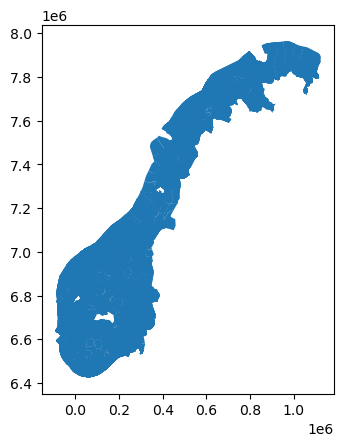

In [78]:
kommuner.sjoin(skoler).plot()

Man får én rad per skole i kommunen. 

For Kongsvinger kommune, får man 11 rader med samme geometri (kommuneflaten), men ulike skolenavn:

In [79]:
kommuner.sjoin(skoler).loc[kommuner.KOMMUNENR=="3401"].drop("index_right", axis=1)

,KOMMUNENR,geometry,kommuneareal,skolenavn
332,3401,"MULTIPOLYGON (((328120.360 6678208.990, 328519...",1.036228e+09,Austmarka barne- og ungdomsskole
332,3401,"MULTIPOLYGON (((328120.360 6678208.990, 328519...",1.036228e+09,Kongsvinger montessoriskole SA
332,3401,"MULTIPOLYGON (((328120.360 6678208.990, 328519...",1.036228e+09,Vennersberg skole
332,3401,"MULTIPOLYGON (((328120.360 6678208.990, 328519...",1.036228e+09,Kongsvinger ungdomsskole
332,3401,"MULTIPOLYGON (((328120.360 6678208.990, 328519...",1.036228e+09,Kongsvinger ungdomsskole
332,3401,"MULTIPOLYGON (((328120.360 6678208.990, 328519...",1.036228e+09,Norges Toppidrettsgymnas ungdomsskole Kongsvin...
332,3401,"MULTIPOLYGON (((328120.360 6678208.990, 328519...",1.036228e+09,Marikollen skole
332,3401,"MULTIPOLYGON (((328120.360 6678208.990, 328519...",1.036228e+09,Langeland skole
332,3401,"MULTIPOLYGON (((328120.360 6678208.990, 328519...",1.036228e+09,Roverud skole
332,3401,"MULTIPOLYGON (((328120.360 6678208.990, 328519...",1.036228e+09,Finnskogen montessoriskole Ba


Det er flest skoler i Oslo:

In [80]:
# tell opp antall rader av hvert kommunenummer, det vil si antall skoler per kommune
kommuner.sjoin(skoler).KOMMUNENR.value_counts()

0301    152
4601    100
5001     71
4204     59
1103     57
       ... 
4221      1
5061      1
5034      1
1839      1
5415      1
Name: KOMMUNENR, Length: 349, dtype: int64

sjoin_nearest kan brukes for å finne avstand til nærmeste skole, og samtidig få kolonneinfoen, i dette tilfellet navnet på nærmeste skole:

,traffic_per_day,speed_limit,roadtype,bridge,tunnel,municipality,geometry,traffic_per_km,FYLKE,traffic_roadtype_mean,speed_roadtype_mean,skolenavn,meter_til_skole
3696,505.854358,50,k,0,0,0301,POINT (266952.188 6651740.044),1907.749710,03,3668.210912,36.478544,Vollebekk skole,98.167093
8750,7081.961014,40,k,1,0,0301,POINT (270161.375 6654074.449),157505.936622,03,3668.210912,36.478544,Grorud skole,158.282833
1320,503.615850,30,k,0,0,3029,POINT (272529.859 6649096.573),1994.236383,30,3668.210912,36.478544,Rudolf steinerskolen Lørenskog,573.113821


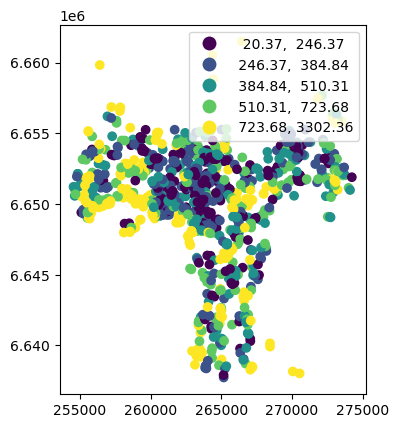

In [81]:
tilfeldige_punkter = veger.sample(1000)
tilfeldige_punkter["geometry"] = tilfeldige_punkter.centroid

joinet = tilfeldige_punkter.sjoin_nearest(skoler, 
                                          distance_col = "meter_til_skole").drop("index_right", axis=1)

joinet.plot("meter_til_skole", scheme="Quantiles", legend=True)
joinet.sample(3)

Hvis man vil lage en kategorisk kolonne med ja/nei hvis mindre/mer enn 500 meter til nærmeste skole:

In [82]:
import numpy as np # pakken pandas er basert på

<AxesSubplot: >

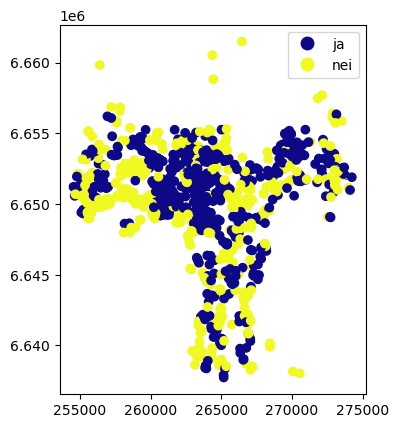

In [83]:
joinet["skole_innen_500m"] = np.where(joinet["meter_til_skole"] < 500, 
                                     "ja",
                                     "nei")

joinet.plot("skole_innen_500m", cmap="plasma", legend=True)

## Overlay

Geopandas har en overlay-funksjon som gjør alt.

Geometrien repareres også automatisk.

Man spesifiserer hvilken overlay man vil ha med 'how'-argumentet. Mer detaljer om det i notebook-en om vernede områder.

Velger noen tilfeldige punkter og bufrer dem 500 meter:

<AxesSubplot: >

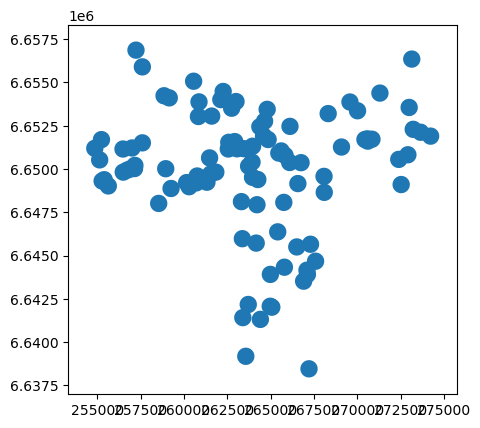

In [84]:
bufrede_punkter = tilfeldige_punkter.sample(100)
bufrede_punkter["geometry"] = bufrede_punkter.buffer(500)
bufrede_punkter.plot()

Her er de fem overlay-mulighetene:

<AxesSubplot: >

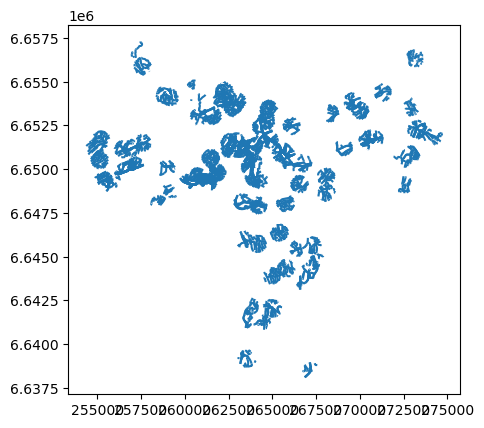

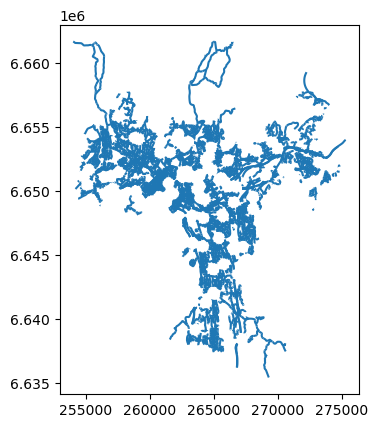

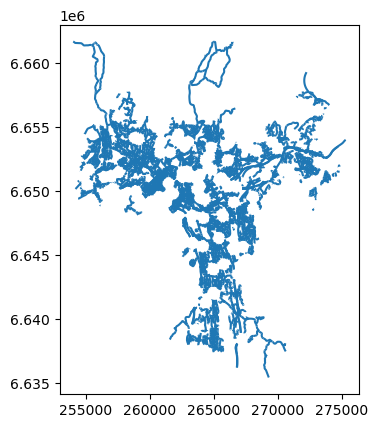

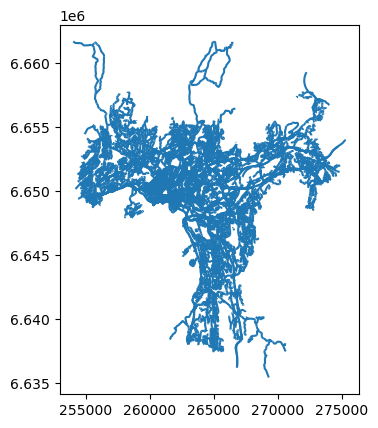

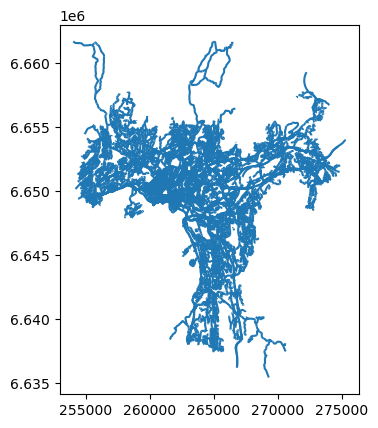

In [85]:
overlay1 = veger.overlay(bufrede_punkter, how = "intersection", keep_geom_type=True)
overlay1.plot()

overlay2 = veger.overlay(bufrede_punkter, how =  "difference", keep_geom_type=True) # = erase i ArcGIS
overlay2.plot()

overlay3 = veger.overlay(bufrede_punkter, how =  "symmetric_difference", keep_geom_type=True) # returnerer det som ikke overlapper i begge dataene
overlay3.plot()

overlay4 = veger.overlay(bufrede_punkter, how =  "identity", keep_geom_type=True)
overlay4.plot()

overlay5 = veger.overlay(bufrede_punkter, how =  "union", keep_geom_type=True)
overlay5.plot()

## Dissolve og til singlepart <a class="anchor" id="first-bullet"></a>

Dette samler alle radene:

In [86]:
dissolvet = bufrede_punkter.dissolve()
dissolvet

,geometry,traffic_per_day,speed_limit,roadtype,bridge,tunnel,municipality,traffic_per_km,FYLKE,traffic_roadtype_mean,speed_roadtype_mean
0,"MULTIPOLYGON (((258949.893 6647728.794, 258920...",302.906801,30,k,0,0,0301,1132.12794,03,3668.210912,36.478544


Dette deler opp ikke-overlappende, altså fra multipolygon til polygon (multipart to singlepart):

In [87]:
singlepart = dissolvet.explode()

singlepart.explore()

C:\Users\ort\AppData\Local\Temp\ipykernel_5980\2086201333.py:1: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  singlepart = dissolvet.explode()


Man kan dissolve 'by' kolonner og velge aggregeringsmetode (default er 'first', som er uheldig):

In [88]:
dissolvet = bufrede_punkter.dissolve(
    by = ["tunnel", "bridge"],
    aggfunc = "sum" # first er default aggregeringsfunksjon
    ) 
dissolvet

c:\Users\ort\Anaconda3\envs\geo_env311\Lib\site-packages\geopandas\geodataframe.py:1676: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aggregated_data = data.groupby(**groupby_kwargs).agg(aggfunc)


geometry  \
tunnel bridge                                                      
0      0       MULTIPOLYGON (((258949.893 6647728.794, 258920...   
       1       MULTIPOLYGON (((264181.450 6642027.943, 264164...   
1      0       POLYGON ((261818.194 6649230.921, 261815.787 6...   
       1       POLYGON ((261204.041 6649145.079, 261196.842 6...   

               traffic_per_day  speed_limit  traffic_per_km  \
tunnel bridge                                                 
0      0         552933.915196         3780    1.736762e+07   
       1         193881.178858          520    2.557576e+07   
1      0          66473.126720           70    7.052602e+05   
       1         134961.244273          150    9.608812e+06   

               traffic_roadtype_mean  speed_roadtype_mean  
tunnel bridge                                              
0      0               773632.481897          3779.173545  
       1               204028.483234           497.937685  
1      0                36630.888655            68.826406  
       1                73261.777310           137.652812

Dette er det samme som pandas groupby + agg, bare at man da ikke får geometrien. 

Dette er som summary statistics i ArcGIS.

In [89]:
oppsummert_uten_geometri = (bufrede_punkter
                            .groupby(["tunnel", "bridge"])
                            .agg("sum")
            )
oppsummert_uten_geometri

C:\Users\ort\AppData\Local\Temp\ipykernel_5980\2758824510.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .agg("sum")


traffic_per_day  speed_limit  traffic_per_km  \
tunnel bridge                                                 
0      0         552933.915196         3780    1.736762e+07   
       1         193881.178858          520    2.557576e+07   
1      0          66473.126720           70    7.052602e+05   
       1         134961.244273          150    9.608812e+06   

               traffic_roadtype_mean  speed_roadtype_mean  
tunnel bridge                                              
0      0               773632.481897          3779.173545  
       1               204028.483234           497.937685  
1      0                36630.888655            68.826406  
       1                73261.777310           137.652812

#### Kort om index og feilmeldingene det fører til

Index er et viktig konsept i pandas, men også i Python generelt.

Index-en starter på 0

In [90]:
liste = [1,2,3]
liste[0]

1

I pandas har man denne numeriske index-en som standard, men man kan også velge hvilke kolonner som skal være index.

Det gjør noen ting enklere å jobbe med (mer om der her: https://www.youtube.com/watch?v=OYZNk7Z9s6I),

men ofte kan index-en skaper problemer og unødvendige feilmeidldinger 

For eksempel når man dissolver 'by' eller bruker pandas.groupby, blir kolonnene man grupperer etter til index for dataframen.

Nå som vi dissolvet 'by' tunnel og bridge, blir disse to til en MultiIndex:

In [91]:
dissolvet.index

MultiIndex([(0, 0),
            (0, 1),
            (1, 0),
            (1, 1)],
           names=['tunnel', 'bridge'])

Og tunnel og brigde er ikke lenger kolonner:

In [92]:
dissolvet.columns

Index(['geometry', 'traffic_per_day', 'speed_limit', 'traffic_per_km',
       'traffic_roadtype_mean', 'speed_roadtype_mean'],
      dtype='object')

Vi kan få dem tilbake som kolonner med reset_index:

In [93]:
dissolvet = dissolvet.reset_index()
dissolvet

,tunnel,bridge,geometry,traffic_per_day,speed_limit,traffic_per_km,traffic_roadtype_mean,speed_roadtype_mean
0,0,0,"MULTIPOLYGON (((258949.893 6647728.794, 258920...",552933.915196,3780,1.736762e+07,773632.481897,3779.173545
1,0,1,"MULTIPOLYGON (((264181.450 6642027.943, 264164...",193881.178858,520,2.557576e+07,204028.483234,497.937685
2,1,0,"POLYGON ((261818.194 6649230.921, 261815.787 6...",66473.126720,70,7.052602e+05,36630.888655,68.826406
3,1,1,"POLYGON ((261204.041 6649145.079, 261196.842 6...",134961.244273,150,9.608812e+06,73261.777310,137.652812


Hvis vi gjør det igjen nå som index er nullstilt, får vi en kolonne kalt "index":

In [94]:
dissolvet = dissolvet.reset_index()
dissolvet

,index,tunnel,bridge,geometry,traffic_per_day,speed_limit,traffic_per_km,traffic_roadtype_mean,speed_roadtype_mean
0,0,0,0,"MULTIPOLYGON (((258949.893 6647728.794, 258920...",552933.915196,3780,1.736762e+07,773632.481897,3779.173545
1,1,0,1,"MULTIPOLYGON (((264181.450 6642027.943, 264164...",193881.178858,520,2.557576e+07,204028.483234,497.937685
2,2,1,0,"POLYGON ((261818.194 6649230.921, 261815.787 6...",66473.126720,70,7.052602e+05,36630.888655,68.826406
3,3,1,1,"POLYGON ((261204.041 6649145.079, 261196.842 6...",134961.244273,150,9.608812e+06,73261.777310,137.652812


Og hvis enda en gang, får vi en index-kolonne for index-nivå 0:

In [95]:
dissolvet = dissolvet.reset_index()
dissolvet

,level_0,index,tunnel,bridge,geometry,traffic_per_day,speed_limit,traffic_per_km,traffic_roadtype_mean,speed_roadtype_mean
0,0,0,0,0,"MULTIPOLYGON (((258949.893 6647728.794, 258920...",552933.915196,3780,1.736762e+07,773632.481897,3779.173545
1,1,1,0,1,"MULTIPOLYGON (((264181.450 6642027.943, 264164...",193881.178858,520,2.557576e+07,204028.483234,497.937685
2,2,2,1,0,"POLYGON ((261818.194 6649230.921, 261815.787 6...",66473.126720,70,7.052602e+05,36630.888655,68.826406
3,3,3,1,1,"POLYGON ((261204.041 6649145.079, 261196.842 6...",134961.244273,150,9.608812e+06,73261.777310,137.652812


Og hvis enda en reset_index, gir pandas opp fordi kolonnen "level_0" allerede finnes...

In [96]:
dissolvet = dissolvet.reset_index()
dissolvet

ValueError: cannot insert level_0, already exists

Vi kan fortsatt resette index hvis vi dropper å få index-en som kolonne:

In [97]:
dissolvet = dissolvet.reset_index(drop=True)
dissolvet

,level_0,index,tunnel,bridge,geometry,traffic_per_day,speed_limit,traffic_per_km,traffic_roadtype_mean,speed_roadtype_mean
0,0,0,0,0,"MULTIPOLYGON (((258949.893 6647728.794, 258920...",552933.915196,3780,1.736762e+07,773632.481897,3779.173545
1,1,1,0,1,"MULTIPOLYGON (((264181.450 6642027.943, 264164...",193881.178858,520,2.557576e+07,204028.483234,497.937685
2,2,2,1,0,"POLYGON ((261818.194 6649230.921, 261815.787 6...",66473.126720,70,7.052602e+05,36630.888655,68.826406
3,3,3,1,1,"POLYGON ((261204.041 6649145.079, 261196.842 6...",134961.244273,150,9.608812e+06,73261.777310,137.652812


Men hvis vi hadde satt drop=True til å begynne med, altså rett etter dissolve eller groupby().agg(), ville vi mistet tunnel- og bridge-kolonnene for godt. 

Før vi går videre, må alle disse index-kolonnene vekk:

In [98]:
dissolvet = dissolvet.loc[:, ~dissolvet.columns.str.contains("index|level_")]
dissolvet

,tunnel,bridge,geometry,traffic_per_day,speed_limit,traffic_per_km,traffic_roadtype_mean,speed_roadtype_mean
0,0,0,"MULTIPOLYGON (((258949.893 6647728.794, 258920...",552933.915196,3780,1.736762e+07,773632.481897,3779.173545
1,0,1,"MULTIPOLYGON (((264181.450 6642027.943, 264164...",193881.178858,520,2.557576e+07,204028.483234,497.937685
2,1,0,"POLYGON ((261818.194 6649230.921, 261815.787 6...",66473.126720,70,7.052602e+05,36630.888655,68.826406
3,1,1,"POLYGON ((261204.041 6649145.079, 261196.842 6...",134961.244273,150,9.608812e+06,73261.777310,137.652812


Index skaper også problemer i spatial join, siden denne, tåpelig nok, returnerer en kolonne kalt "index_right":

In [99]:
dissolvet = dissolvet.sjoin(bufrede_punkter[["geometry"]])
dissolvet

,tunnel,bridge,geometry,traffic_per_day,speed_limit,traffic_per_km,traffic_roadtype_mean,speed_roadtype_mean,index_right
0,0,0,"MULTIPOLYGON (((258949.893 6647728.794, 258920...",552933.915196,3780,1.736762e+07,773632.481897,3779.173545,683
0,0,0,"MULTIPOLYGON (((258949.893 6647728.794, 258920...",552933.915196,3780,1.736762e+07,773632.481897,3779.173545,5044
0,0,0,"MULTIPOLYGON (((258949.893 6647728.794, 258920...",552933.915196,3780,1.736762e+07,773632.481897,3779.173545,3816
0,0,0,"MULTIPOLYGON (((258949.893 6647728.794, 258920...",552933.915196,3780,1.736762e+07,773632.481897,3779.173545,734
0,0,0,"MULTIPOLYGON (((258949.893 6647728.794, 258920...",552933.915196,3780,1.736762e+07,773632.481897,3779.173545,3032
...,...,...,...,...,...,...,...,...,...
0,0,0,"MULTIPOLYGON (((258949.893 6647728.794, 258920...",552933.915196,3780,1.736762e+07,773632.481897,3779.173545,1696
0,0,0,"MULTIPOLYGON (((258949.893 6647728.794, 258920...",552933.915196,3780,1.736762e+07,773632.481897,3779.173545,1698
0,0,0,"MULTIPOLYGON (((258949.893 6647728.794, 258920...",552933.915196,3780,1.736762e+07,773632.481897,3779.173545,1521
0,0,0,"MULTIPOLYGON (((258949.893 6647728.794, 258920...",552933.915196,3780,1.736762e+07,773632.481897,3779.173545,2015


Som gir feilmelding neste gang fordi "index_right" ikke kan være kolonnenavn i en join:

In [100]:
dissolvet = dissolvet.sjoin(bufrede_punkter[["geometry"]])
dissolvet

ValueError: 'index_left' and 'index_right' cannot be names in the frames being joined

### Heldigvis kan man unngå alle disse problemene ved å lage sine egne funksjoner:

In [101]:
def diss(gdf, **qwargs):
    """ Dissolve, reset_index, riktige kolonnenavn. """
    
    dissolvet = gdf.dissolve(**qwargs)
    
    dissolvet = dissolvet.reset_index()
    
    # kolonner fra tuple til string
    dissolvet.columns = ["_".join(kolonne).strip("_") if isinstance(kolonne, tuple) else kolonne for kolonne in dissolvet.columns]

    # fjern index-kolonner
    dissolvet = dissolvet.loc[:, ~dissolvet.columns.str.contains('index|level_')]

    return dissolvet


def min_sjoin(gdf_left, gdf_right, **qwargs):
    
    # fjern index-kolonner
    left_kopi = gdf_left.loc[:, ~gdf_left.columns.str.contains('index|level_')]
    right_kopi = gdf_right.loc[:, ~gdf_right.columns.str.contains('index|level_')]
    
    joinet = left_kopi.sjoin(right_kopi, **qwargs)

    # fjern index-kolonner igjen
    joinet = joinet.loc[:, ~joinet.columns.str.contains('index|level_')]
    
    return joinet

Nå funker ting som det skal uten å måtte skrive/kopiere så mye tekst hver gang:

In [102]:
dissolvet = diss(bufrede_punkter[["tunnel", "bridge", "traffic_per_day", "speed_limit", "geometry"]],
                 
    by = ["tunnel", "bridge"],
    
    aggfunc = ("sum", "mean"),
    
    )

joinet = min_sjoin(dissolvet, bufrede_punkter[["geometry"]])
joinet

,tunnel,bridge,geometry,traffic_per_day_sum,traffic_per_day_mean,speed_limit_sum,speed_limit_mean
0,0,0,"MULTIPOLYGON (((258949.893 6647728.794, 258920...",552933.915196,6212.74062,3780,42.47191
0,0,0,"MULTIPOLYGON (((258949.893 6647728.794, 258920...",552933.915196,6212.74062,3780,42.47191
0,0,0,"MULTIPOLYGON (((258949.893 6647728.794, 258920...",552933.915196,6212.74062,3780,42.47191
0,0,0,"MULTIPOLYGON (((258949.893 6647728.794, 258920...",552933.915196,6212.74062,3780,42.47191
0,0,0,"MULTIPOLYGON (((258949.893 6647728.794, 258920...",552933.915196,6212.74062,3780,42.47191
...,...,...,...,...,...,...,...
0,0,0,"MULTIPOLYGON (((258949.893 6647728.794, 258920...",552933.915196,6212.74062,3780,42.47191
0,0,0,"MULTIPOLYGON (((258949.893 6647728.794, 258920...",552933.915196,6212.74062,3780,42.47191
0,0,0,"MULTIPOLYGON (((258949.893 6647728.794, 258920...",552933.915196,6212.74062,3780,42.47191
0,0,0,"MULTIPOLYGON (((258949.893 6647728.794, 258920...",552933.915196,6212.74062,3780,42.47191


## buffer, dissolve og til singlepart (explode)

For å slippe å styre med index, reparering av geometri og lignende hver gang, kan det være greit med en funksjon som gjør akkurat det man vil.

Kaller den buffdissexp for å gjøre det tydelig og eksplisitt hva den gjør (buffer, dissolve og explode):

In [103]:
def buffdissexp(gdf, avstand, resolution=50, **qwargs):

    kopi = gdf.copy()
        
    kopi["geometry"] = kopi.buffer(avstand, resolution=resolution).make_valid() #reparerer geometrien

    dissolvet = kopi.dissolve(**qwargs).reset_index()
    dissolvet = dissolvet.loc[:, ~dissolvet.columns.str.contains('index|level_')]

    dissolvet.columns = ["_".join(kolonne).strip("_") if isinstance(kolonne, tuple) else kolonne for kolonne in dissolvet.columns]

    singlepart = dissolvet.explode(ignore_index=True)

    return singlepart

Og så slenger jeg på en funksjon som tetter hull i polygoner:

In [104]:
def tett_hull(gdf):

    # shapely er pakken som håndterer GIS-biten i geopandas. Det vil si, shapely er mellomleddet mellom geopandas og GEOS (GIS-algoritmene som brukes i QGIS, POSTGIS, sf i R osv.)
    from shapely import polygons, get_exterior_ring, get_parts
    from shapely.ops import unary_union
    
    def tett_radvis(x):
        hull_tettet = polygons(get_exterior_ring(get_parts(x)))
        return unary_union(hull_tettet)
    
    kopi = gdf.copy(deep=True)
    kopi["geometry"] = kopi.geometry.map(tett_radvis)

    return kopi

Nå kan man enklere gjenta bufring, dissolving og singleparting. Og hvis man vil endre noe på koden, treger man bare å gjøre det ett sted (i funksjonene man lager).

In [105]:
buffutinn = buff(bufrede_punkter, 25)
buffutinn = buff(bufrede_punkter, 25)
buffutinn = buff(bufrede_punkter, 25)
buffutinn = buff(bufrede_punkter, 25)
buffutinn = buffdissexp(bufrede_punkter, 12.5)
buffutinn = buffdissexp(bufrede_punkter, -12.5)
buffutinn = tett_hull(bufrede_punkter)
buffutinn = buffdissexp(bufrede_punkter, 1)
buffutinn = buffdissexp(bufrede_punkter, -1)

## Mer om tett_hull()

En mer fleksibel variant ligger her:

In [106]:
import sys
sys.path.append(r"C:\Users\ort\OneDrive - Statistisk sentralbyrå\Dokumenter\GitHub")

import geopandasgreier as gg # https://github.com/mortewle/geopandasgreier
gg.tett_hull

<function geopandasgreier.buffer_dissolve_explode.tett_hull(geom, max_km2=None)>

Velger først ut nabokommunene til Hol og Hemsedal, som inneholder to hull (Hol og Hemsedal).

<AxesSubplot: >

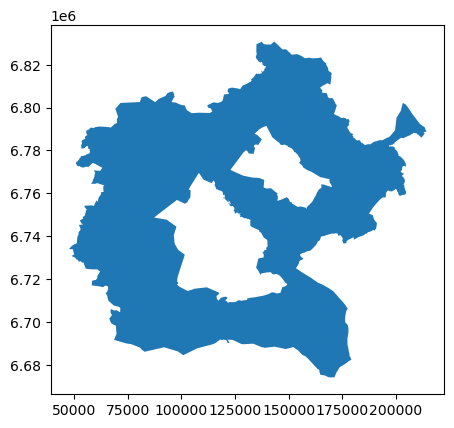

In [107]:
import kommfylk # https://github.com/statisticsnorway/kommfylk/blob/main/eksempler/bruk.ipynb
naboer_hol = kommfylk.nabokommuner("3044", aar=2022)
naboer_hemsedal = kommfylk.nabokommuner("3042", aar=2022)
naboer_hol_og_hemsedal = kommuner[kommuner.KOMMUNENR.isin(naboer_hol+naboer_hemsedal)].dissolve()
naboer_hol_og_hemsedal.plot()

Her kan man tette hull under en viss størrelse:

<AxesSubplot: >

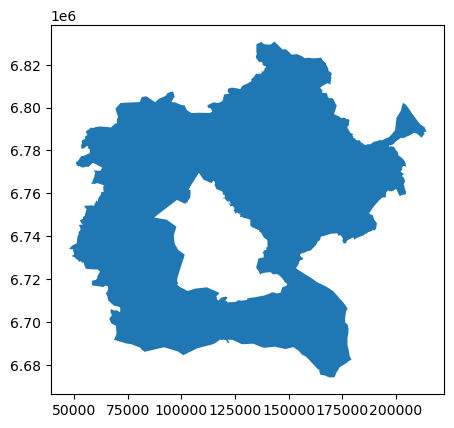

In [108]:
gg.tett_hull(naboer_hol_og_hemsedal, max_km2 = 1000).plot()

Eller alle hull:

<AxesSubplot: >

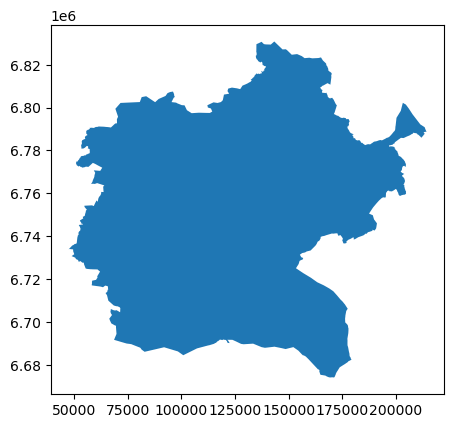

In [109]:
gg.tett_hull(naboer_hol_og_hemsedal).plot()

## Mer om dissolve

Hvis vi vil ha ulike og/eller flere aggregeringsfunksjoner, kan vi gjøre sånn:

In [110]:
dissolvet = bufrede_punkter.dissolve(
    
    by = ["bridge", "tunnel"], 
    
    # aggregerings i ordbok (dictionary)
    aggfunc = {"municipality": "first",
               "roadtype": "count", 
               "speed_limit": ["sum", "mean"],
               "traffic_per_day": ["median", np.std],
              }
)

dissolvet = dissolvet.reset_index()

dissolvet

,bridge,tunnel,geometry,"(municipality, first)","(roadtype, count)","(speed_limit, sum)","(speed_limit, mean)","(traffic_per_day, median)","(traffic_per_day, std)"
0,0,0,"MULTIPOLYGON (((258949.893 6647728.794, 258920...",0301,89,3780,42.47191,1107.370630,13708.971170
1,0,1,"POLYGON ((261818.194 6649230.921, 261815.787 6...",0301,1,70,70.00000,66473.126720,NaN
2,1,0,"MULTIPOLYGON (((264181.450 6642027.943, 264164...",0301,8,520,65.00000,19567.766687,16787.566086
3,1,1,"POLYGON ((261204.041 6649145.079, 261196.842 6...",0301,2,150,75.00000,67480.622137,11312.828665


Man kan også bruke egendefinerte aggregeringsfunksjoner.

Enten noe man definerer som en vanlig funksjon, eller en anonym funksjon (lambda) som kan plasseres på selve linja. I dette eksemplet er de to funksjonene like.

In [111]:
def min_aggfunc(x):
    return x.size - x.count()
    
dissolvet = bufrede_punkter.dissolve(
    
    by = ["bridge", "tunnel"], 
    
    # aggregerings i ordbok (dictionary)
    aggfunc = {"municipality": "first",
               "roadtype": ["first", "count"], 
               "speed_limit": min_aggfunc, 
               "traffic_per_day": lambda x: x.size - x.count(), 
              }
)

dissolvet = dissolvet.reset_index()

dissolvet

,bridge,tunnel,geometry,"(municipality, first)","(roadtype, first)","(roadtype, count)","(speed_limit, min_aggfunc)","(traffic_per_day, <lambda>)"
0,0,0,"MULTIPOLYGON (((258949.893 6647728.794, 258920...",0301,k,89,0,0
1,0,1,"POLYGON ((261818.194 6649230.921, 261815.787 6...",0301,e,1,0,0
2,1,0,"MULTIPOLYGON (((264181.450 6642027.943, 264164...",0301,k,8,0,0
3,1,1,"POLYGON ((261204.041 6649145.079, 261196.842 6...",0301,e,2,0,0


Når man dissolver 'by' flere kolonner, får man dumme kolonnenavn i tuple-format, f.eks. (municipality, first):

In [112]:
dissolvet

,bridge,tunnel,geometry,"(municipality, first)","(roadtype, first)","(roadtype, count)","(speed_limit, min_aggfunc)","(traffic_per_day, <lambda>)"
0,0,0,"MULTIPOLYGON (((258949.893 6647728.794, 258920...",0301,k,89,0,0
1,0,1,"POLYGON ((261818.194 6649230.921, 261815.787 6...",0301,e,1,0,0
2,1,0,"MULTIPOLYGON (((264181.450 6642027.943, 264164...",0301,k,8,0,0
3,1,1,"POLYGON ((261204.041 6649145.079, 261196.842 6...",0301,e,2,0,0


Jeg vil ha kolonnene som tekst med underscore, altså municipality_first.

Man kan endre dette med for-loop:

In [113]:
for kolonne in dissolvet.columns:
    if isinstance(kolonne, tuple):
        dissolvet = dissolvet.rename(columns = {kolonne: "_".join(kolonne).strip("_")})

dissolvet

,bridge,tunnel,geometry,municipality_first,roadtype_first,roadtype_count,speed_limit_min_aggfunc,traffic_per_day_<lambda>
0,0,0,"MULTIPOLYGON (((258949.893 6647728.794, 258920...",0301,k,89,0,0
1,0,1,"POLYGON ((261818.194 6649230.921, 261815.787 6...",0301,e,1,0,0
2,1,0,"MULTIPOLYGON (((264181.450 6642027.943, 264164...",0301,k,8,0,0
3,1,1,"POLYGON ((261204.041 6649145.079, 261196.842 6...",0301,e,2,0,0


Eller med list comprehension (raskere enn for-loop):

In [114]:
dissolvet.columns = ["_".join(kolonne).strip("_") if isinstance(kolonne, tuple) else kolonne for kolonne in dissolvet.columns]
dissolvet

,bridge,tunnel,geometry,municipality_first,roadtype_first,roadtype_count,speed_limit_min_aggfunc,traffic_per_day_<lambda>
0,0,0,"MULTIPOLYGON (((258949.893 6647728.794, 258920...",0301,k,89,0,0
1,0,1,"POLYGON ((261818.194 6649230.921, 261815.787 6...",0301,e,1,0,0
2,1,0,"MULTIPOLYGON (((264181.450 6642027.943, 264164...",0301,k,8,0,0
3,1,1,"POLYGON ((261204.041 6649145.079, 261196.842 6...",0301,e,2,0,0


Som er det som gjøres i diss-funksjonen ovenfor:

In [115]:
diss(bufrede_punkter,
     
     by = ["bridge", "tunnel"],
     
     aggfunc = {"municipality": "first", 
                "speed_limit": ["sum","mean"],
                "traffic_per_day": ["sum","mean"]
                }
)

,bridge,tunnel,geometry,municipality_first,speed_limit_sum,speed_limit_mean,traffic_per_day_sum,traffic_per_day_mean
0,0,0,"MULTIPOLYGON (((258949.893 6647728.794, 258920...",0301,3780,42.47191,552933.915196,6212.740620
1,0,1,"POLYGON ((261818.194 6649230.921, 261815.787 6...",0301,70,70.00000,66473.126720,66473.126720
2,1,0,"MULTIPOLYGON (((264181.450 6642027.943, 264164...",0301,520,65.00000,193881.178858,24235.147357
3,1,1,"POLYGON ((261204.041 6649145.079, 261196.842 6...",0301,150,75.00000,134961.244273,67480.622137


Det som skjer:

In [116]:
en_tuple = ("hei", "du", "der", "")
en_tuple

('hei', 'du', 'der', '')

In [117]:
tuple_samlet_som_string = "_".join(en_tuple)
tuple_samlet_som_string

'hei_du_der_'

In [118]:
uten_underscore_ytterst = tuple_samlet_som_string.strip("_")
uten_underscore_ytterst

'hei_du_der'

## Bruk av ordbok

Ordbøker kan iblant være veldig nyttig. 

For eksempel hvis man har kommunenummer og vil ha navn. Da kan man lage seg en ordbok med navn og nummer.

In [119]:
from kommfylk import kommuner_fra_api

komm = kommuner_fra_api(2022, navn=True)
komm

,KOMMUNENR,NAVN
0,0301,Oslo
1,1101,Eigersund
2,1103,Stavanger
3,1106,Haugesund
4,1108,Sandnes
...,...,...
351,5440,Berlevåg
352,5441,Deatnu - Tana
353,5442,Unjárga - Nesseby
354,5443,Båtsfjord


In [120]:
kommuneordbok = {kommnr: kommnavn for kommnr, kommnavn in zip(komm["KOMMUNENR"], komm["NAVN"])}

veger["kommnavn"] = veger["municipality"].map(kommuneordbok)
veger["kommnavn"]

0        Oslo
1        Oslo
2        Oslo
3        Oslo
4        Oslo
         ... 
13226    Oslo
13227    Oslo
13228    Oslo
13229    Oslo
13230    Oslo
Name: kommnavn, Length: 13231, dtype: object

pandas map godtar ordbøker, pandas-kolonner og funksjoner (for funksjoner er det vanligere å bruke apply). Kjekt for radvis manipulering av data. 

Men map/apply er treigere enn å gjøre ting direkte på kolonnen, hvis det er mulig. Det gjelder enklere greier som dette:

In [121]:
# disse tre linjene gjør det samme
veger["speed_limit_miles"] = veger["speed_limit"].map(lambda x: x*0.62) # treigt
veger["speed_limit_miles"] = veger["speed_limit"].apply(lambda x: x*0.62) # treigt
veger["speed_limit_miles"] = veger["speed_limit"] * 0.62 # raskt

Annet eksempel: bruke ordbok for å lagre lister over kommunenes naboer, hvis man skulle trenge data for området rundt kommunen man beregner for.

In [122]:
# først klargjør kommunedata og vegdata
kommuner = gpd.read_file(r"C:\Users\ort\OneDrive - Statistisk sentralbyrå\data\Basisdata_0000_Norge_25833_Kommuner_FGDB.gdb", 
                         layer="kommune")
kommuner["KOMMUNENR"] = kommuner.kommunenummer
kommuner = kommuner.sort_values("KOMMUNENR")
veger["KOMMUNENR"] = veger.municipality

In [123]:
# lager en tom ordbok
naboordbok = {}

# looper for hver kommune
for kommune in kommuner.KOMMUNENR.unique():

    #spatial join mellom kommunen og alle andre andre kommuner
    kommunen = kommuner.loc[kommuner.KOMMUNENR == kommune, ["geometry"]]
    andre_kommuner = kommuner.loc[kommuner.KOMMUNENR != kommune, ["KOMMUNENR", "geometry"]]
    joinet = kommunen.sjoin(andre_kommuner)

    # gjør liste over unike kommunenumre til value og kommunen til key i naboordboka
    naboer = list(joinet.KOMMUNENR.unique())
    naboordbok[kommune] = naboer

# nå er kommunene keys, og naboene values. Så dette gir en liste over oslos nabokommuner:
print("Oslos nabokommuner:")
naboordbok["0301"]

Oslos nabokommuner:


['3020', '3023', '3024', '3054', '3007', '3028', '3029', '3030', '3031']

Hvis man trenger data for nabokommuner, kan man loope via naboordboka:

In [124]:
for kommnr, naboer in naboordbok.items(): # items() er en metode for dictionary-typen, som gir oss nøkler og verdier samtidig.
    
    relevante_veger = veger.loc[(veger["KOMMUNENR"]==kommnr) | (veger["KOMMUNENR"].isin(naboer))]

## Enda litt mer om dissolve (dictionary comprehension)
Hvis man har veldig mange kolonner og vil ha 'sum' hvis numerisk og 'first' ellers:

In [125]:
# dictionary comprehension hvor kolonnenavnet er key og aggregeringsfunksjonen er value
aggfunc = {kolonne: "sum" 
           if ('float' or 'int') in str(bufrede_punkter[kolonne].dtype)
           else 'first'
           for kolonne in bufrede_punkter.columns}
aggfunc

{'traffic_per_day': 'sum',
 'speed_limit': 'first',
 'roadtype': 'first',
 'bridge': 'first',
 'tunnel': 'first',
 'municipality': 'first',
 'geometry': 'first',
 'traffic_per_km': 'sum',
 'FYLKE': 'first',
 'traffic_roadtype_mean': 'sum',
 'speed_roadtype_mean': 'sum'}

Dictionary comprehension fungerer på samme måte som list comprehension, bare at man spesifiserer nøkkel: verdi (key: value), med kolon.

Man må også fjerne kolonnene som dissolves 'by' og geometri-kolonnen fra ordboka:

In [126]:
by = ["bridge", "tunnel"]

aggfunc = {kolonne: "sum" if ('float' or 'int') in str(bufrede_punkter[kolonne].dtype) else "first" for kolonne in bufrede_punkter.columns # denne linja er samme som alt over
           if kolonne!="geometry" and kolonne not in by}

aggfunc

{'traffic_per_day': 'sum',
 'speed_limit': 'first',
 'roadtype': 'first',
 'municipality': 'first',
 'traffic_per_km': 'sum',
 'FYLKE': 'first',
 'traffic_roadtype_mean': 'sum',
 'speed_roadtype_mean': 'sum'}

Så man man dissolve:

In [127]:
dissolvet = diss(bufrede_punkter,

                 by = by,
                
                 aggfunc = aggfunc
)
dissolvet

,bridge,tunnel,geometry,traffic_per_day,speed_limit,roadtype,municipality,traffic_per_km,FYLKE,traffic_roadtype_mean,speed_roadtype_mean
0,0,0,"MULTIPOLYGON (((258949.893 6647728.794, 258920...",552933.915196,30,k,0301,1.736762e+07,03,773632.481897,3779.173545
1,0,1,"POLYGON ((261818.194 6649230.921, 261815.787 6...",66473.126720,70,e,0301,7.052602e+05,03,36630.888655,68.826406
2,1,0,"MULTIPOLYGON (((264181.450 6642027.943, 264164...",193881.178858,50,k,0301,2.557576e+07,03,204028.483234,497.937685
3,1,1,"POLYGON ((261204.041 6649145.079, 261196.842 6...",134961.244273,80,e,0301,9.608812e+06,03,73261.777310,137.652812
